#### IMPORTING THE NECESSARY LIBRARIES:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!pip install cryptocmd
from cryptocmd import CmcScraper

from sklearn.preprocessing import MinMaxScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.0 MB/s eta 0:00:00


### IMPORTING THE DATA 

In [2]:
scraper = CmcScraper('BTC', '01-04-2017', '01-05-2023')
#INTO DATAFRAMES
data = scraper.get_dataframe()
data.sort_values(by='Date', inplace=True)
data.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
4,2023-04-27,28428.464279,29871.546352,28402.887387,29473.786184,2.715345e+10,5.705502e+11
3,2023-04-28,29481.013535,29572.791693,28929.608542,29340.262498,1.754446e+10,5.679930e+11
2,2023-04-29,29336.567035,29452.455245,29088.042336,29248.488373,1.066263e+10,5.662405e+11
1,2023-04-30,29245.515512,29952.028553,29114.021236,29268.807043,1.465220e+10,5.666613e+11
0,2023-05-01,29227.103982,29329.936221,27680.792640,28091.568804,1.865560e+10,5.439007e+11


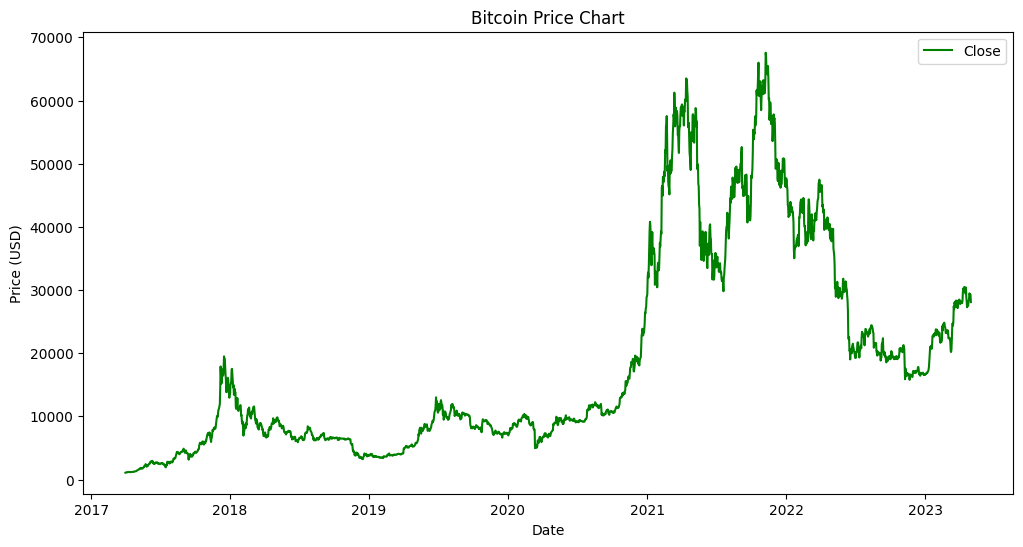

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))
data_indexed = data.set_index('Date')

# Plot the opening prices in blue
# ax.plot(data_indexed.index, data_indexed['Open'], color='red',linewidth = 3, label='Open')

# Plot the closing prices in red
ax.plot(data_indexed.index, data_indexed['Close'], color='green', label='Close')

# Add title and axis labels
ax.set_title('Bitcoin Price Chart')
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')

# Add legend
ax.legend()

# Show the plot
plt.show()

### Spliting the data before and after pandemic

In [4]:
# for training the model
data_train = data[data['Date'] < '2020-04-01'].copy()
data_train

,Date,Open,High,Low,Close,Volume,Market Cap
2221,2017-04-01,1071.709961,1091.719971,1061.089966,1080.500000,2.896340e+08,1.755760e+10
2220,2017-04-02,1080.609985,1107.589966,1075.449951,1102.170044,5.141870e+08,1.791192e+10
2219,2017-04-03,1102.949951,1151.739990,1102.949951,1143.810059,5.804440e+08,1.859116e+10
2218,2017-04-04,1145.520020,1156.439941,1120.520020,1133.250000,4.363100e+08,1.842126e+10
2217,2017-04-05,1134.140015,1135.089966,1113.630005,1124.780029,4.147840e+08,1.828586e+10
...,...,...,...,...,...,...,...
1130,2020-03-27,6719.388974,6793.836197,6466.701806,6469.798135,3.458560e+10,1.183361e+11
1129,2020-03-28,6467.254046,6467.501165,6117.837749,6242.193868,3.488523e+10,1.141837e+11
1128,2020-03-29,6245.624627,6250.467309,5920.086018,5922.043123,2.837369e+10,1.083385e+11
1127,2020-03-30,5925.538489,6517.195789,5903.234347,6429.841934,3.710165e+10,1.176401e+11


In [5]:
# for testing the model
data_test = data[data['Date'] > '2020-04-01'].copy()
data_test

,Date,Open,High,Low,Close,Volume,Market Cap
1124,2020-04-02,6606.776268,7088.247324,6595.918277,6793.624596,4.766065e+10,1.243351e+11
1123,2020-04-03,6797.396592,7003.220784,6673.335758,6733.387391,3.897650e+10,1.232441e+11
1122,2020-04-04,6738.383020,6878.953518,6696.484668,6867.527316,3.318599e+10,1.257128e+11
1121,2020-04-05,6862.537826,6883.414143,6715.929300,6791.129441,2.951041e+10,1.243289e+11
1120,2020-04-06,6788.049803,7271.781153,6782.889745,7271.781153,4.689690e+10,1.331404e+11
...,...,...,...,...,...,...,...
4,2023-04-27,28428.464279,29871.546352,28402.887387,29473.786184,2.715345e+10,5.705502e+11
3,2023-04-28,29481.013535,29572.791693,28929.608542,29340.262498,1.754446e+10,5.679930e+11
2,2023-04-29,29336.567035,29452.455245,29088.042336,29248.488373,1.066263e+10,5.662405e+11
1,2023-04-30,29245.515512,29952.028553,29114.021236,29268.807043,1.465220e+10,5.666613e+11


In [6]:
train = data_train.drop(['Date', 'Close'], axis = 1)
train.head()

,Open,High,Low,Volume,Market Cap
2221,1071.709961,1091.719971,1061.089966,289633984.0,1.755760e+10
2220,1080.609985,1107.589966,1075.449951,514187008.0,1.791192e+10
2219,1102.949951,1151.739990,1102.949951,580444032.0,1.859116e+10
2218,1145.520020,1156.439941,1120.520020,436310016.0,1.842126e+10
2217,1134.140015,1135.089966,1113.630005,414784000.0,1.828586e+10


In [7]:
# performing MinMaxScaler
scaler = MinMaxScaler()
train = scaler.fit_transform(train)
train

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.43839236e-03,
        0.00000000e+00],
       [4.83589464e-04, 8.35382491e-04, 8.01651182e-04, 4.47397806e-03,
        1.14686487e-03],
       [1.69744817e-03, 3.15940068e-03, 2.33684826e-03, 5.36966351e-03,
        3.34545302e-03],
       ...,
       [2.81128512e-01, 2.71551892e-01, 2.71255146e-01, 3.81088420e-01,
        2.93841802e-01],
       [2.63736393e-01, 2.85592243e-01, 2.70314396e-01, 4.99076021e-01,
        3.23949513e-01],
       [2.91179641e-01, 2.84924755e-01, 2.96604106e-01, 4.40741883e-01,
        3.24512505e-01]])

In [8]:
train.shape[0]

1096

In [9]:
train_X = []
train_Y = []

for i in range(60, train.shape[0]):
    train_X.append(train[i-60:i])
    train_Y.append(train[i,0])

X_train, Y_train = np.array(train_X), np.array(train_Y)

In [10]:
X_train.shape

(1036, 60, 5)

# Building LSTM

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

regressor = Sequential()

regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units =1))

In [12]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [13]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 20, batch_size =50)

Epoch 1/20
21/21 [==============================] - 12s 197ms/step - loss: 0.0478
Epoch 2/20
21/21 [==============================] - 3s 135ms/step - loss: 0.0135
Epoch 3/20
21/21 [==============================] - 3s 139ms/step - loss: 0.0094
Epoch 4/20
21/21 [==============================] - 3s 153ms/step - loss: 0.0084
Epoch 5/20
21/21 [==============================] - 3s 159ms/step - loss: 0.0073
Epoch 6/20
21/21 [==============================] - 3s 141ms/step - loss: 0.0075
Epoch 7/20
21/21 [==============================] - 3s 140ms/step - loss: 0.0068
Epoch 8/20
21/21 [==============================] - 4s 172ms/step - loss: 0.0060
Epoch 9/20
21/21 [==============================] - 3s 145ms/step - loss: 0.0068
Epoch 10/20
21/21 [==============================] - 3s 139ms/step - loss: 0.0057
Epoch 11/20
21/21 [==============================] - 3s 143ms/step - loss: 0.0060
Epoch 12/20
21/21 [==============================] - 4s 181ms/step - loss: 0.0057
Epoch 13/20
21/21 [=====

 # Test Dataset

In [14]:
test_dataset = data_train.tail(90)
df= test_dataset.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Close'], axis = 1)
df.head()

<ipython-input-14-54bf48160380>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= test_dataset.append(data_test, ignore_index = True)


,Open,High,Low,Volume,Market Cap
0,7202.551122,7212.155253,6935.269972,2.080208e+10,1.266994e+11
1,6984.428612,7413.715099,6914.995908,2.811148e+10,1.332334e+11
2,7345.375275,7427.385794,7309.514012,1.844427e+10,1.344425e+11
3,7410.451694,7544.496872,7400.535561,1.972507e+10,1.344695e+11
4,7410.452168,7781.867183,7409.293182,2.327626e+10,1.409765e+11


In [15]:
inputs = scaler.transform(df)
inputs

array([[0.33312383, 0.32217429, 0.32792814, 0.2787328 , 0.35327271],
       [0.32127198, 0.33278423, 0.32679634, 0.37754378, 0.37442227],
       [0.34088428, 0.33350384, 0.34882045, 0.24685908, 0.37833565],
       ...,
       [1.53579209, 1.49288399, 1.56461437, 0.14166421, 1.77598958],
       [1.53084474, 1.51918109, 1.56606466, 0.19559653, 1.77735159],
       [1.52984433, 1.4864347 , 1.48605417, 0.24971589, 1.70367959]])

In [16]:
Xtest = []
Ytest = []

for i in range (60, inputs.shape[0]):
    Xtest.append(inputs[i-60:i])
    Ytest.append(inputs[i, 0])

X_test, Y_test = np.array(Xtest), np.array(Ytest)
X_test.shape, Y_test.shape

((1155, 60, 5), (1155,))

In [17]:
Y_pred = regressor.predict(X_test)
Y_pred, Y_test

37/37 [==============================] - 2s 32ms/step


(array([[0.35972595],
        [0.35361457],
        [0.34788433],
        ...,
        [1.1186378 ],
        [1.1266127 ],
        [1.1391139 ]], dtype=float32),
 array([0.40705919, 0.42347531, 0.41929983, ..., 1.53579209, 1.53084474,
        1.52984433]))

In [18]:
scaler.scale_

array([5.43357458e-05, 5.26391146e-05, 5.58253482e-05, 1.35183470e-11,
       3.23682326e-12])

In [19]:
scale = 1/5.18164146e-05
scale

19298.903787912797

In [20]:
Y_test = Y_test*scale
Y_pred = Y_pred*scale


In [21]:
Y_pred

array([[ 6942.317 ],
       [ 6824.3735],
       [ 6713.786 ],
       ...,
       [21588.484 ],
       [21742.39  ],
       [21983.65  ]], dtype=float32)

In [22]:
Y_test

array([ 7855.79614001,  8172.60919979,  8092.02715406, ...,
       29639.10375047, 29543.6252726 , 29524.31856736])

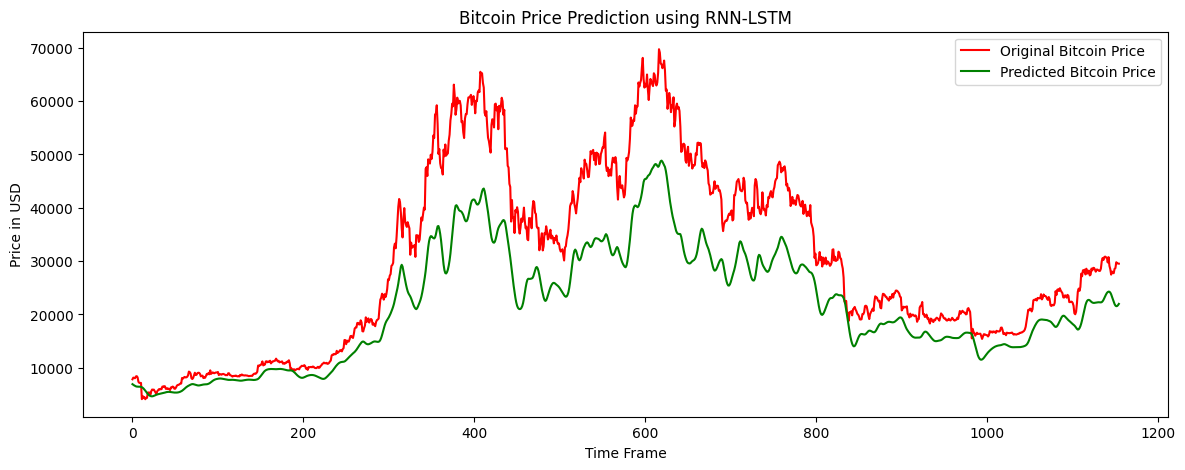

In [23]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Original Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time Frame')
plt.ylabel('Price in USD')
plt.legend()
plt.show()